In [1]:
import numpy as np
import pandas as pd

In [2]:
from statsmodels.tsa.ar_model import AR, ARResults

In [3]:
PATH = "../Data/uspopulation.csv"

In [4]:
df = pd.read_csv(PATH, index_col='DATE', parse_dates=True)

In [5]:
df.index.freq = 'MS'

In [6]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


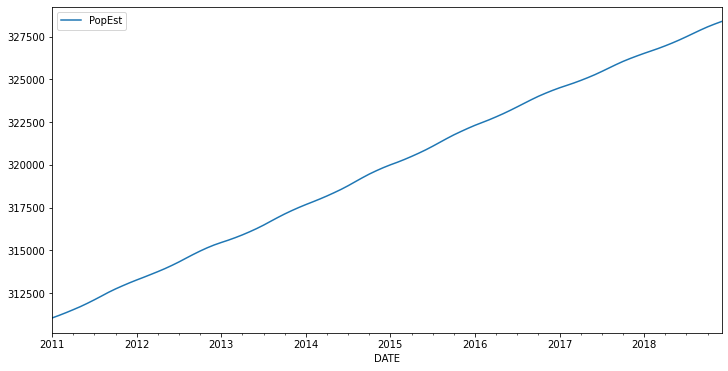

In [7]:
df.plot(figsize=(12, 6))

In [8]:
len(df)

96

In [9]:
length = 84
train = df.iloc[:length]
test = df.iloc[length:]

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
model = AR(train['PopEst'])

In [12]:
AR1fit = model.fit(maxlag=1)

In [13]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [14]:
start = len(train)
end = len(train) + len(test) - 1

In [15]:
AR1fit.predict(start, end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [16]:
predictions1 = AR1fit.predict(start, end)

In [17]:
predictions1 = predictions1.rename('AR-1 Predictions')

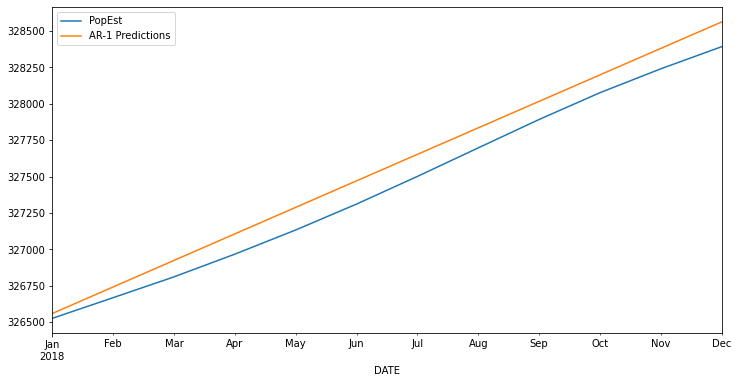

In [18]:
test.plot(figsize=(12, 6), legend=True)
predictions1.plot(legend=True)

In [19]:
model = AR(train['PopEst'])
AR2fit = model.fit(maxlag=2)

In [20]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [21]:
predictions2 = AR2fit.predict(start, end)

In [22]:
predictions2 = predictions2.rename('AR-2 Predictions')

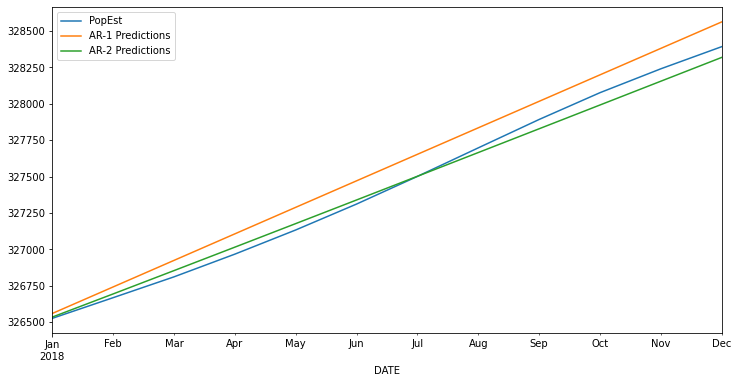

In [23]:
test.plot(figsize=(12, 6), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [24]:
# Automatic maxlag length

model = AR(train['PopEst'])
ARfit = model.fit(ic='t-stat')

In [25]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [26]:
predictions8 = ARfit.predict(start, end)
predictions8 = predictions8.rename('AR-8 Predictions')

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
labels = ['AR-1', 'AR-2', 'AR-8']

In [29]:
preds = [predictions1, predictions2, predictions8]

In [30]:
for i in range(len(labels)):
    error = np.sqrt(mean_squared_error(test['PopEst'], preds[i]))
    print(f'{labels[i]} RMSE: \t{error}')

AR-1 RMSE: 	132.09736649865175
AR-2 RMSE: 	52.088948482477754
AR-8 RMSE: 	13.673717034715962


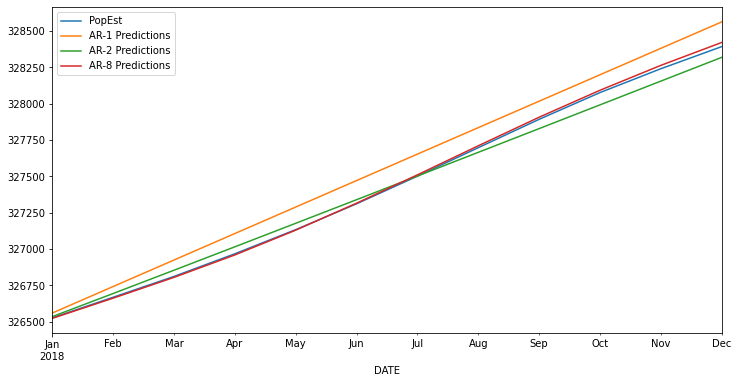

In [31]:
test.plot(figsize=(12, 6), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True)

In [32]:
# FORECASTING

model = AR(df['PopEst'])
ARfit = model.fit(maxlag=8)

In [33]:
# NOTE: Forecast length <= Test Set Length

forecasted_values = ARfit.predict(start=len(df), end=len(df)+12)
forecasted_values = forecasted_values.rename('Forecast')

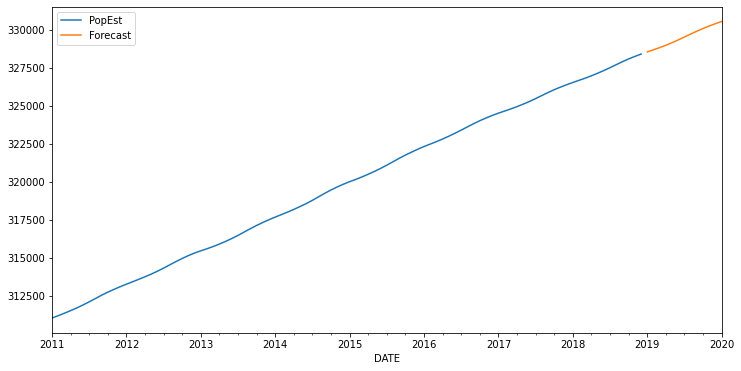

In [34]:
df['PopEst'].plot(figsize=(12, 6), legend=True)
forecasted_values.plot(legend=True)